# [Module 50: putting together what we learned](https://youtu.be/tpCFfeUEGs8?t=26887)
## Predicting medical costs

In [11]:
# imports and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# import sklearn
from sklearn.model_selection import train_test_split
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
# convert sex and smoker to int
# we'll use one hot encoding (one value gets 1, everything else is 0)

# get dummies converts categorical variable to numeric for one hot encoding
insurance_one_hot = pd.get_dummies(insurance_data)
print(insurance_one_hot)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

# [Module 51: putting together what we learned: building a regression model](https://youtu.be/tpCFfeUEGs8?t=27698)
I will
1. Create features and values
2. Create training and test set
3. Build a neural network

didn't really follow the tutorial for this, did most of it on my own and then watched how he did it

In [7]:
# create features and values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [12]:
# train test split
# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# build neural network
tf.random.set_seed(42)

# build model
insurance_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile model
insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit data
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 434us/step - loss: 8656.2715 - mae: 8656.2715
Epoch 2/100
34/34 [==============================] - 0s 387us/step - loss: 7819.6309 - mae: 7819.6309
Epoch 3/100
34/34 [==============================] - 0s 333us/step - loss: 7598.0396 - mae: 7598.0396
Epoch 4/100
34/34 [==============================] - 0s 382us/step - loss: 7797.8857 - mae: 7797.8857
Epoch 5/100
34/34 [==============================] - 0s 312us/step - loss: 7740.6807 - mae: 7740.6807
Epoch 6/100
34/34 [==============================] - 0s 357us/step - loss: 7648.0996 - mae: 7648.0996
Epoch 7/100
34/34 [==============================] - 0s 369us/step - loss: 7536.2583 - mae: 7536.2583
Epoch 8/100
34/34 [==============================] - 0s 359us/step - loss: 7788.8418 - mae: 7788.8418
Epoch 9/100
34/34 [==============================] - 0s 367us/step - loss: 7584.9038 - mae: 7584.9038
Epoch 10/100
34/34 [==============================] - 0s 380us/step - loss: 7717.6

In [18]:
# check results on test data
insurance_model.evaluate(X_test, y_test)

# ok this first model attempt isn't very good

9/9 [==============================] - 0s 543us/step - loss: 7063.7847 - mae: 7063.7847


[7063.78466796875, 7063.78466796875]

# [Module 52 improving the model](https://youtu.be/tpCFfeUEGs8?t=28501)

didn't really follow the tutorial for this, did most of it on my own and then watched how he did it

Epoch 1/100
34/34 [==============================] - 0s 509us/step - loss: 9442.5244 - mae: 9442.5244
Epoch 2/100
34/34 [==============================] - 0s 361us/step - loss: 7313.7666 - mae: 7313.7666
Epoch 3/100
34/34 [==============================] - 0s 471us/step - loss: 6852.1616 - mae: 6852.1616
Epoch 4/100
34/34 [==============================] - 0s 388us/step - loss: 6384.8628 - mae: 6384.8628
Epoch 5/100
34/34 [==============================] - 0s 349us/step - loss: 6216.7339 - mae: 6216.7339
Epoch 6/100
34/34 [==============================] - 0s 330us/step - loss: 5875.0586 - mae: 5875.0586
Epoch 7/100
34/34 [==============================] - 0s 361us/step - loss: 5448.2085 - mae: 5448.2085
Epoch 8/100
34/34 [==============================] - 0s 361us/step - loss: 4931.3315 - mae: 4931.3315
Epoch 9/100
34/34 [==============================] - 0s 345us/step - loss: 4207.8208 - mae: 4207.8208
Epoch 10/100
34/34 [==============================] - 0s 334us/step - loss: 3913.5

Text(0, 0.5, 'loss')

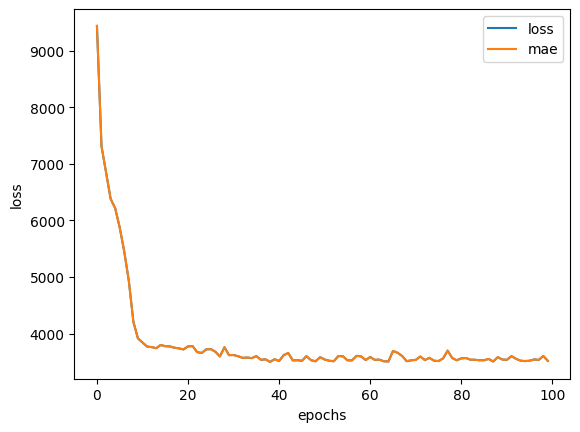

In [63]:
# build neural network
tf.random.set_seed(42)

# build model
insurance_model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, name="hidden_layer1"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# compile model
insurance_model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.2),
              metrics=["mae"])

# fit data
history = insurance_model2.fit(X_train, y_train, epochs=100)

# check results on test data
print(insurance_model2.evaluate(X_test, y_test))
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

# [Module 52 preprocessing data 1: normalization and standardization](https://youtu.be/tpCFfeUEGs8?t=29445)

- Normalization: change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. Sklearn's MinMaxScalar does this.
- Standardization: scaling data to fit a standard normal distribution. Sklearn's StandardScalar does this.


<Axes: ylabel='Frequency'>

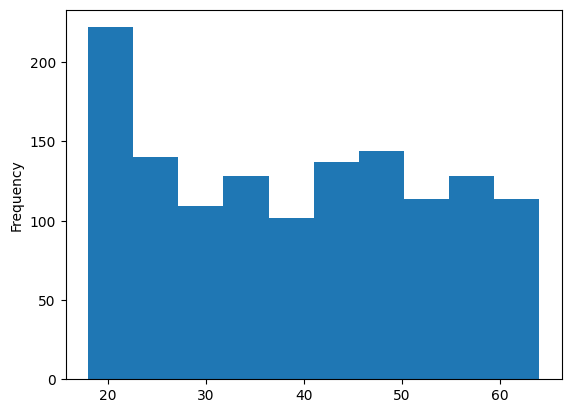

In [65]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

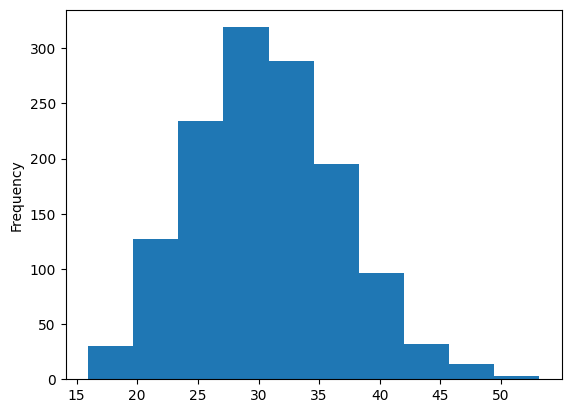

In [67]:
X["bmi"].plot(kind="hist")

# [Module 53 preprocessing data 2: normalizing data](https://youtu.be/tpCFfeUEGs8?t=30021)


In [68]:
# imports and dataset
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [69]:
# create column transformer:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # normalize these columns
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])  # if there are cols the OneHotEncoder doesn't know about, ignore them
)

# create X and y:
X = insurance_data.drop("charges", axis=1)
y = insurance_data["charges"]

# train and tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit column transformer to training data
ct.fit(X_train)

# transform training and test data with normalization (MinMaxScalar) and oneHotEncoder
X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)

In [73]:
# what does data look like now:
print(X_train.loc[0])
print(X_train_normalized[0])

# how has shape changed?
print(X_train.shape, X_train_normalized.shape)  # added columns from oneHotEncoding

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object
[0.60869565 0.10734463 0.4        1.         0.         1.
 0.         0.         1.         0.         0.        ]
(1070, 6) (1070, 11)


# [Module 55 preprocessing data 3: building an NN on normalized data](https://youtu.be/tpCFfeUEGs8?t=30677)

didn't really follow the tutorial for this, did most of it on my own and then watched how he did it

Epoch 1/100
34/34 [==============================] - 0s 518us/step - loss: 11721.4023 - mae: 11721.4023
Epoch 2/100
34/34 [==============================] - 0s 406us/step - loss: 7568.2988 - mae: 7568.2988
Epoch 3/100
34/34 [==============================] - 0s 391us/step - loss: 5893.5171 - mae: 5893.5171
Epoch 4/100
34/34 [==============================] - 0s 396us/step - loss: 3885.8708 - mae: 3885.8708
Epoch 5/100
34/34 [==============================] - 0s 411us/step - loss: 3649.7715 - mae: 3649.7715
Epoch 6/100
34/34 [==============================] - 0s 453us/step - loss: 3664.9514 - mae: 3664.9514
Epoch 7/100
34/34 [==============================] - 0s 407us/step - loss: 3587.3801 - mae: 3587.3801
Epoch 8/100
34/34 [==============================] - 0s 545us/step - loss: 3597.1169 - mae: 3597.1169
Epoch 9/100
34/34 [==============================] - 0s 445us/step - loss: 3546.2949 - mae: 3546.2949
Epoch 10/100
34/34 [==============================] - 0s 387us/step - loss: 3532

Text(0, 0.5, 'loss')

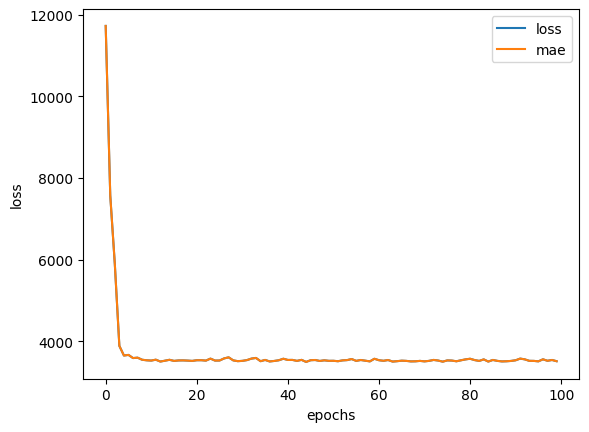

In [97]:
tf.random.set_seed(42)

# build model
normalized_cost_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, name="hidden_layer1"),
    tf.keras.layers.Dense(10, name="hidden_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="medical_cost_prediction_model_normalized")

# compile
normalized_cost_model.compile(loss=tf.keras.losses.mae,
                              optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                              metrics=["mae"])

# fit data
history = normalized_cost_model.fit(X_train_normalized, y_train, epochs=100)  # remember we're using regular y_train

# check results on test data
print(normalized_cost_model.evaluate(X_test_normalized, y_test))
# it got a bit worse with the exact same hyperparameters. It happens sometimes. The above changes are slightly better
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")